Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
dataset = pd.read_excel('/content/drive/My Drive/Colab Notebooks/DS Project/labeled_dataset.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/DS Project/labeled_dataset.xlsx'

In [ ]:
pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 49.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=639fe6d1cdd5072ee16c81c209734db87f24e7e39896264f53c574afd47bb4c4
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=d3346c0d0393f2efcbebcd52860ce4277876aabbf27aef3cb63fbe76adbd9198
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1b

In [ ]:
from newspaper import Article

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'sentence', 'news_link', 'outlet', 'topic', 'type',
       'group_id', 'num_sent', 'Label_bias', 'Label_opinion', 'article',
       'biased_words4'],
      dtype='object')

In [ ]:
dataset.head(5)

,Unnamed: 0,sentence,news_link,outlet,topic,type,group_id,num_sent,Label_bias,Label_opinion,article,biased_words4
0,0,YouTube is making clear there will be no “birt...,https://eu.usatoday.com/story/tech/2020/02/03/...,usa-today,elections-2020,center,1,1,Biased,Somewhat factual but also opinionated,YouTube says no ‘deepfakes’ or ‘birther’ video...,"['belated', 'birtherism']"
1,1,The increasingly bitter dispute between Americ...,https://www.nbcnews.com/news/sports/women-s-te...,msnbc,sport,left,1,1,Non-biased,Entirely factual,"FRISCO, Texas — The increasingly bitter disput...",['bitter']
2,2,So while there may be a humanitarian crisis dr...,https://www.alternet.org/2019/01/here-are-5-of...,alternet,immigration,left,1,1,Biased,Expresses writer’s opinion,Speaking to the country for the first time fro...,['crisis']
3,3,A professor who teaches climate change classes...,https://www.breitbart.com/politics/2019/05/09/...,breitbart,environment,right,1,1,Non-biased,No agreement,A professor who teaches climate change classes...,['legitimate']
4,4,"Looking around the United States, there is nev...",https://thefederalist.com/2020/03/11/woman-who...,federalist,abortion,right,1,1,Biased,Somewhat factual but also opinionated,The left has a thing for taking babies hostage...,"['killing', 'never', 'developing', 'humans', '..."


In [ ]:
dataset.isna().any()

Unnamed: 0       False
sentence         False
news_link         True
outlet           False
topic            False
type             False
group_id         False
num_sent         False
Label_bias       False
Label_opinion    False
article           True
biased_words4    False
dtype: bool

In [ ]:
dataset.shape

(1700, 12)

In [ ]:
dataset.dropna(inplace=True)
dataset.shape



(1581, 12)

In [ ]:
from newspaper import Article, ArticleException

def extract_text(url):
  count = 0
  try:
    article = Article(url)
    article.download()
    article.parse()
    return article.text
  except ArticleException as e:
    count = count+1
    print(f"Failed to extract text from URL {url}: {e}")
    return None

dataset['Text'] = dataset['news_link'].apply(extract_text)

Failed to extract text from URL https://www.reuters.com/article/us-doping-wada-russia/doping-wada-bitterly-disappointed-at-russias-failure-to-meet-deadline-idUSKCN1OV1Q5: Article `download()` failed with 401 Client Error: HTTP Forbidden for url: https://www.reuters.com/article/us-doping-wada-russia/doping-wada-bitterly-disappointed-at-russias-failure-to-meet-deadline-idUSKCN1OV1Q5 on URL https://www.reuters.com/article/us-doping-wada-russia/doping-wada-bitterly-disappointed-at-russias-failure-to-meet-deadline-idUSKCN1OV1Q5
Failed to extract text from URL https://www.reuters.com/article/us-volkswagen-emissions-baden-wuerttembe/german-state-of-baden-wuerttemberg-sues-vw-for-damages-faz-idUSKCN1OZ0C8: Article `download()` failed with 401 Client Error: HTTP Forbidden for url: https://www.reuters.com/article/us-volkswagen-emissions-baden-wuerttembe/german-state-of-baden-wuerttemberg-sues-vw-for-damages-faz-idUSKCN1OZ0C8 on URL https://www.reuters.com/article/us-volkswagen-emissions-baden-wu

In [ ]:
dataset.isna().any()

Unnamed: 0       False
sentence         False
news_link        False
outlet           False
topic            False
type             False
group_id         False
num_sent         False
Label_bias       False
Label_opinion    False
article          False
biased_words4    False
Text              True
dtype: bool

In [ ]:
droped_dataset = dataset.dropna()
droped_dataset.shape


(1372, 13)

In [ ]:
droped_dataset.drop(columns = ['Unnamed: 0'], inplace=True)

<ipython-input-32-73eda757c956>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_dataset.drop(columns = ['Unnamed: 0'], inplace=True)


In [ ]:
droped_dataset.isna().any()

sentence         False
news_link        False
outlet           False
topic            False
type             False
group_id         False
num_sent         False
Label_bias       False
Label_opinion    False
article          False
biased_words4    False
Text             False
dtype: bool

In [ ]:
droped_dataset.columns

Index(['sentence', 'news_link', 'outlet', 'topic', 'type', 'group_id',
       'num_sent', 'Label_bias', 'Label_opinion', 'article', 'biased_words4',
       'Text'],
      dtype='object')

In [ ]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

# Preprocess the text data
def preprocess_text(text):
    # Tokenize, lowercase, and remove stopwords
    return preprocess_string(text)

# Preprocess the 'Text' column
dataset['Preprocessed_Text'] = dataset['Text'].apply(preprocess_text)

# Create a dictionary from the preprocessed text data
dictionary = corpora.Dictionary(dataset['Preprocessed_Text'])

# Convert the preprocessed text data into a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in dataset['Preprocessed_Text']]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3)

# Print the topics generated by the LDA model
print("Topics generated by LDA model:")
for topic_id, topic in lda_model.print_topics():
    print(f"Topic {topic_id + 1}: {topic}")


In [ ]:
dataset.shape

(1581, 13)

In [ ]:
dataset[dataset['Text'] == '']

,Unnamed: 0,sentence,news_link,outlet,topic,type,group_id,num_sent,Label_bias,Label_opinion,article,biased_words4,Text
672,672,Abortion rights advocates worry this could mak...,https://www.msn.com/en-us/news/politics/voters...,msnbc,abortion,left,34,1,Non-biased,Entirely factual,© Pete Marovich—Getty Images Abortion rights a...,[],
809,809,The votes come as a new conservative majority ...,https://www.msn.com/en-us/news/politics/voters...,msnbc,abortion,left,41,1,Non-biased,No agreement,© Pete Marovich—Getty Images Abortion rights a...,['nervous'],


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

count_vectorizer = CountVectorizer(stop_words='english')
X = count_vectorizer.fit_transform(droped_dataset['Text'])

# Apply LDA to obtain topic embeddings for each text
lda = LatentDirichletAllocation(n_components=3, random_state=42)
topic_embeddings = lda.fit_transform(X)
topic_embeddings.shape

(1372, 3)

In [ ]:
droped_dataset.shape

(1372, 12)

In [ ]:
droped_dataset['LDA_embeddings'] = list(map(list, topic_embeddings))

<ipython-input-42-11e9e617c774>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droped_dataset['LDA_embeddings'] = list(map(list, topic_embeddings))


In [ ]:
droped_dataset.to_csv('/content/drive/My Drive/Colab Notebooks/DS Project/Dataset_with_LDA_embeddings.csv', index = False)

In [3]:
import pandas as pd
droped_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS Project/Dataset_with_LDA_embeddings.csv')

In [4]:
droped_dataset.columns

Index(['sentence', 'news_link', 'outlet', 'topic', 'type', 'group_id',
       'num_sent', 'Label_bias', 'Label_opinion', 'article', 'biased_words4',
       'Text', 'LDA_embeddings'],
      dtype='object')

In [5]:
droped_dataset.dropna(inplace=True)

In [23]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Assuming 'Text' column contains the text data
texts = droped_dataset['Text']
print(texts)

# Tokenize the text
tokenized_texts = [word_tokenize(text.lower()) for text in texts]

# Create a dictionary representation of the documents
dictionary = Dictionary(tokenized_texts)

# Filter out words that occur less than 10 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Create a document-term matrix
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Compute coherence scores for different numbers of topics
coherence_scores = []
for num_topics in range(2, 11):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Choose the number of topics with the highest coherence score
print(coherence_scores)
optimal_num_topics = max(coherence_scores, key=lambda x: x[1])[0]

print("Optimal number of topics:", optimal_num_topics)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       Matt O'Brien\n\nAssociated Press\n\nYouTube is...
1       FRISCO, Texas — The increasingly bitter disput...
2       Speaking to the country for the first time fro...
3       A professor who teaches climate change classes...
4       The left has a thing for taking babies hostage...
                              ...                        
1367    The House Democrats’ coronavirus recovery bill...
1368    There are many reasons that Republicans and co...
1369    A man’s penis becomes a female penis once a ma...
1370    As a self-described Democratic socialist, Sen....
1371    CBS Late Show host Stephen Colbert claimed on ...
Name: Text, Length: 1370, dtype: object


[(2, 0.21557926695350235), (3, 0.22532385914708777), (4, 0.2423781118645435), (5, 0.2356339609061508), (6, 0.23628703549599708), (7, 0.24830774535873673), (8, 0.24468270556388655), (9, 0.23769726647179187), (10, 0.245755159537898)]
Optimal number of topics: 7


In [6]:
dataset = droped_dataset.copy()

In [7]:
dataset.columns, dataset.shape

(Index(['sentence', 'news_link', 'outlet', 'topic', 'type', 'group_id',
        'num_sent', 'Label_bias', 'Label_opinion', 'article', 'biased_words4',
        'Text', 'LDA_embeddings'],
       dtype='object'),
 (1370, 13))

In [9]:
dataset.dtypes

sentence          object
news_link         object
outlet            object
topic             object
type              object
group_id           int64
num_sent           int64
Label_bias        object
Label_opinion     object
article           object
biased_words4     object
Text              object
LDA_embeddings    object
dtype: object

# K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

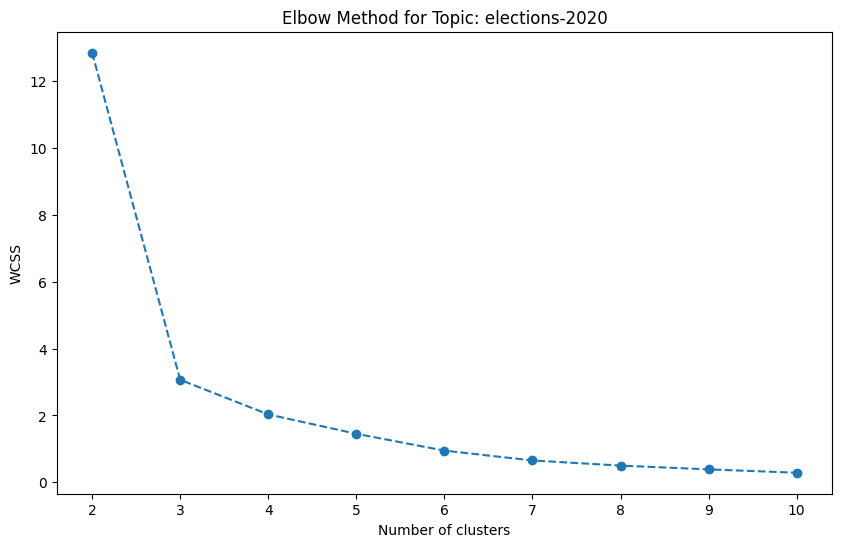

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: elections-2020, Optimum Clusters: 3, Silhouette Score: 0.7532108640762565


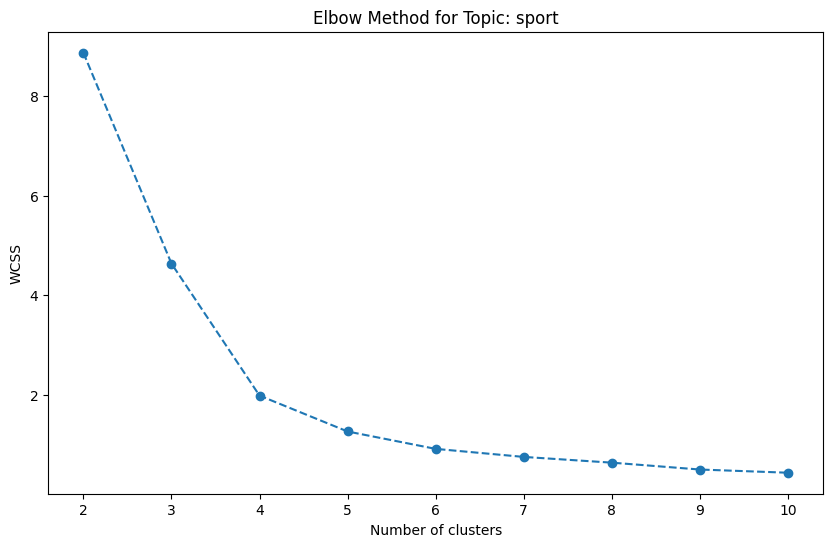

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: sport, Optimum Clusters: 3, Silhouette Score: 0.7273461611486576


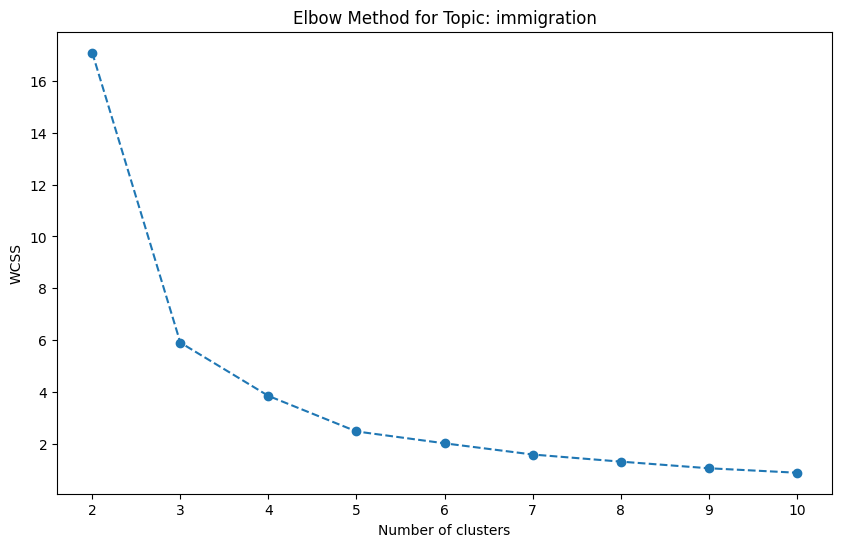

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Topic: immigration, Optimum Clusters: 3, Silhouette Score: 0.6298184656527323


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

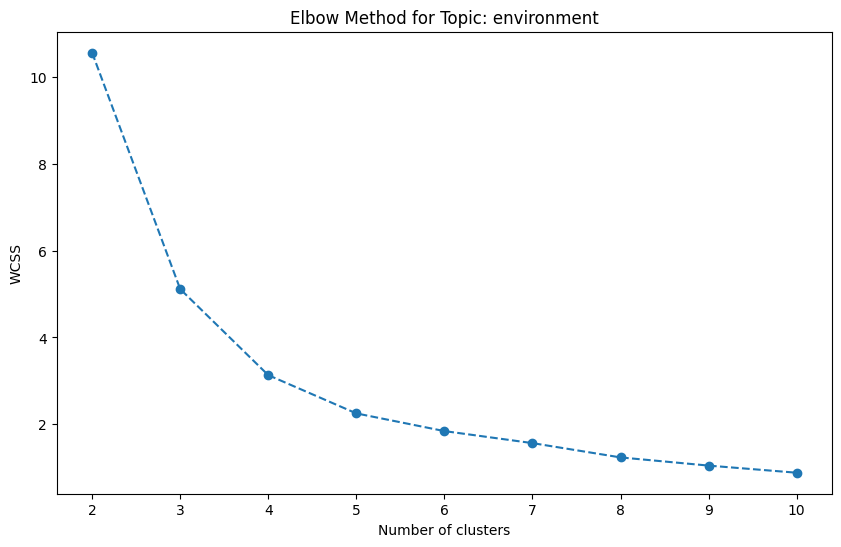

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: environment, Optimum Clusters: 4, Silhouette Score: 0.6090734529119278


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


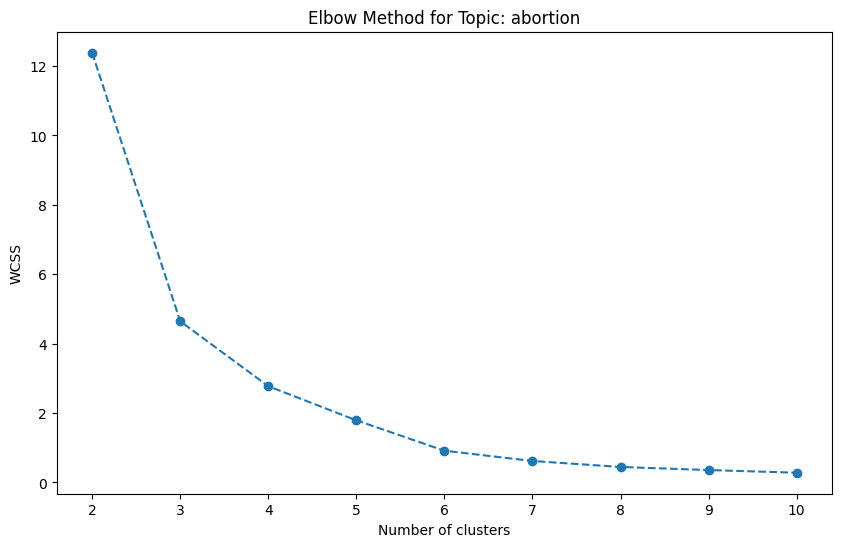

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: abortion, Optimum Clusters: 10, Silhouette Score: 0.7105745064972406


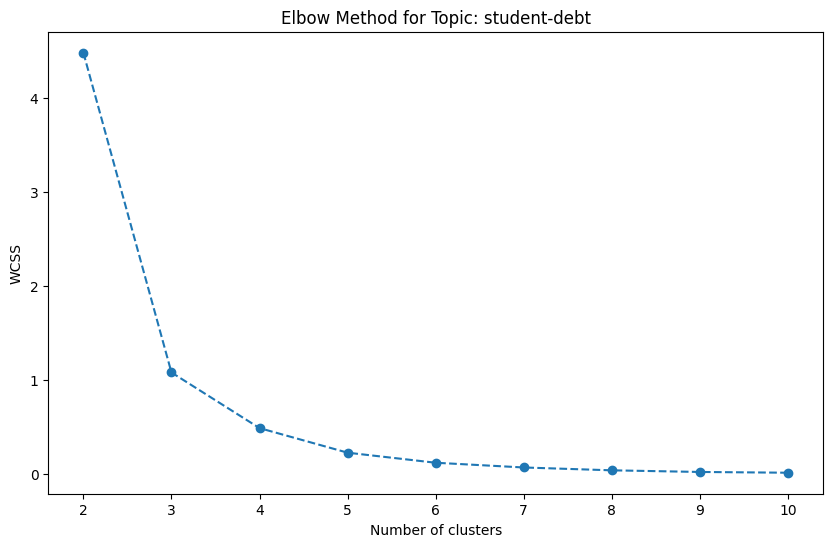

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: student-debt, Optimum Clusters: 3, Silhouette Score: 0.9359060707461753


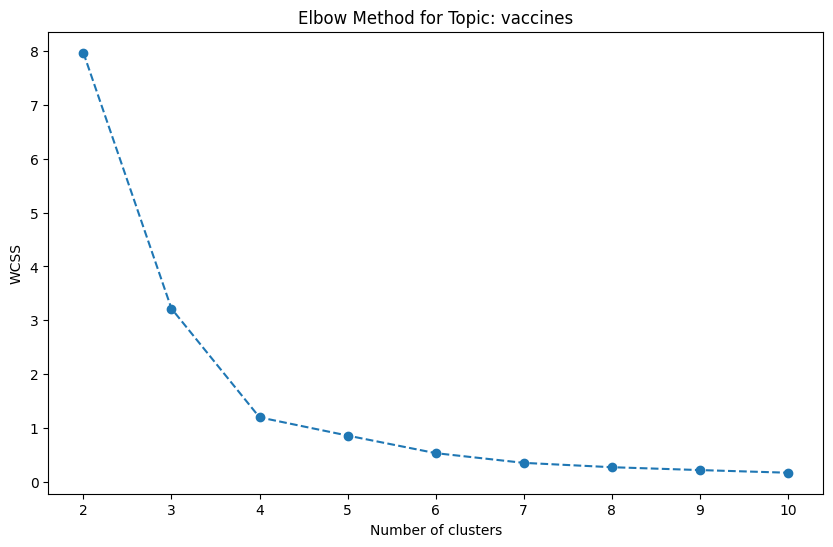

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: vaccines, Optimum Clusters: 10, Silhouette Score: 0.8040994170602943


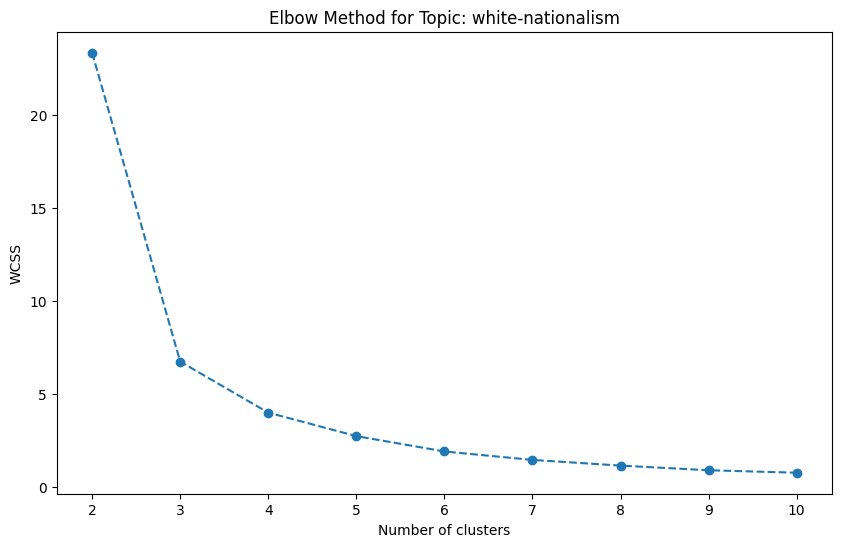

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: white-nationalism, Optimum Clusters: 8, Silhouette Score: 0.7266152085205514


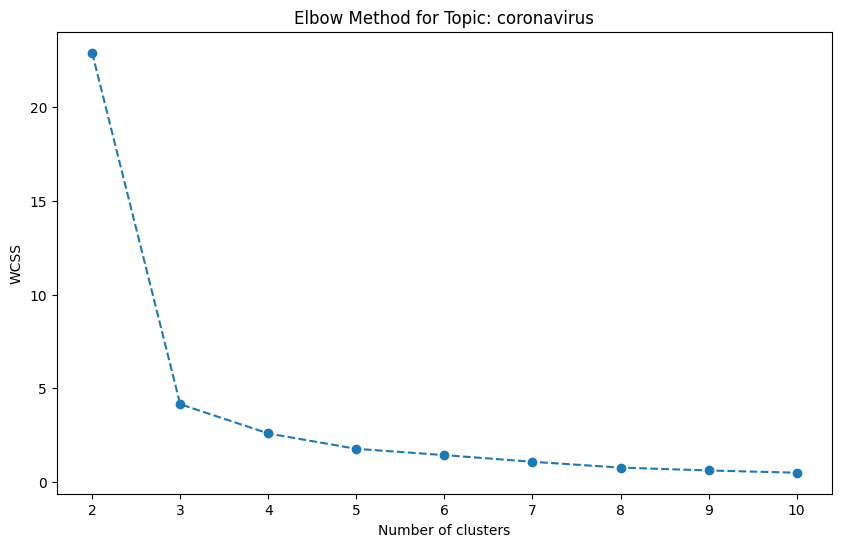

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: coronavirus, Optimum Clusters: 3, Silhouette Score: 0.7685410264714237


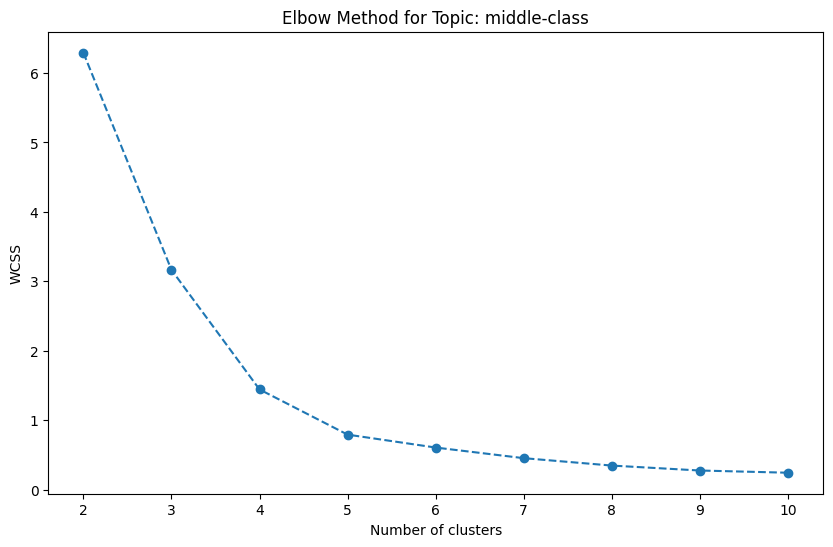

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: middle-class, Optimum Clusters: 4, Silhouette Score: 0.7522828303556716


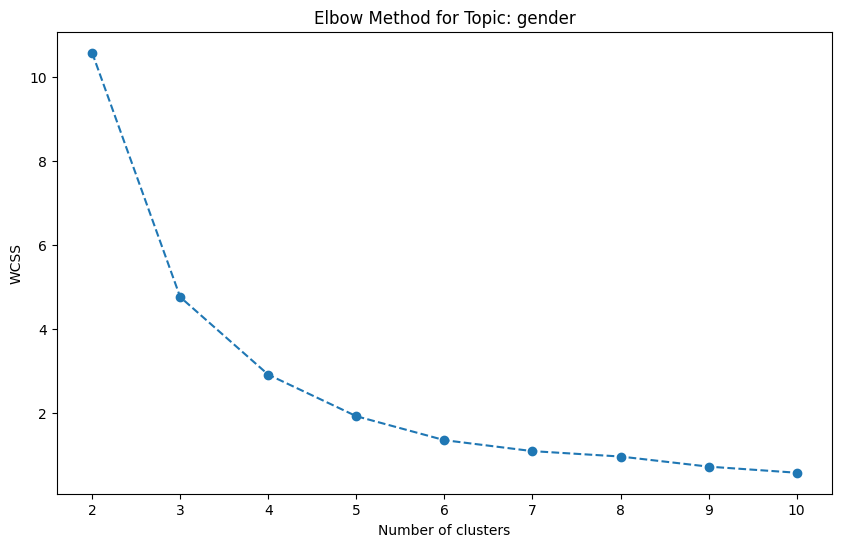

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: gender, Optimum Clusters: 5, Silhouette Score: 0.6538264059454107


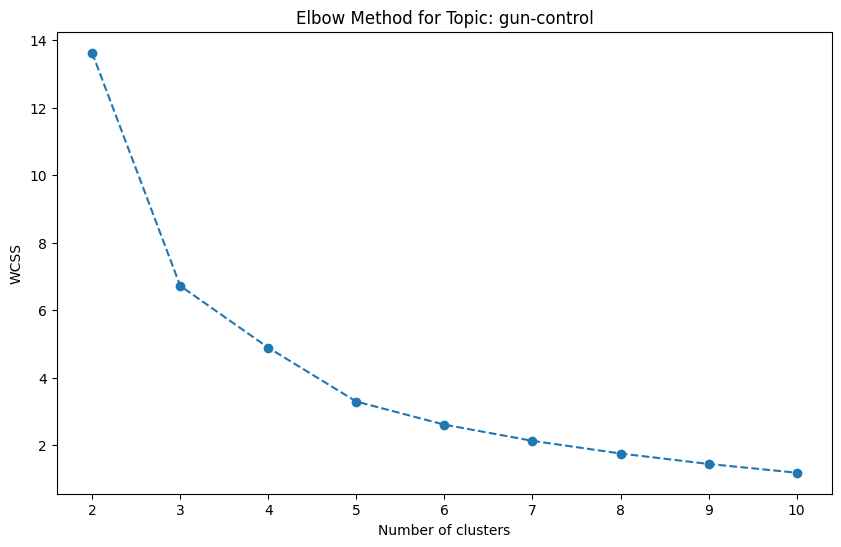

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: gun-control, Optimum Clusters: 3, Silhouette Score: 0.5511179430571145


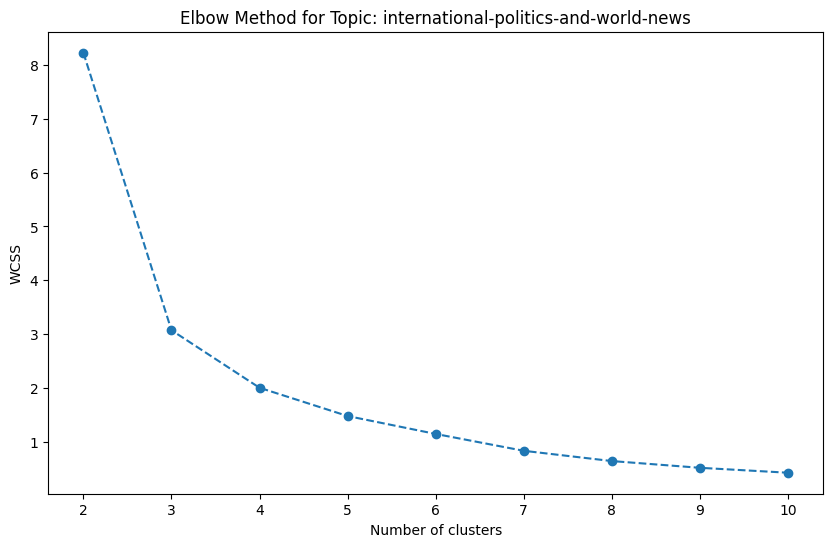

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Topic: international-politics-and-world-news, Optimum Clusters: 10, Silhouette Score: 0.6650363959101521


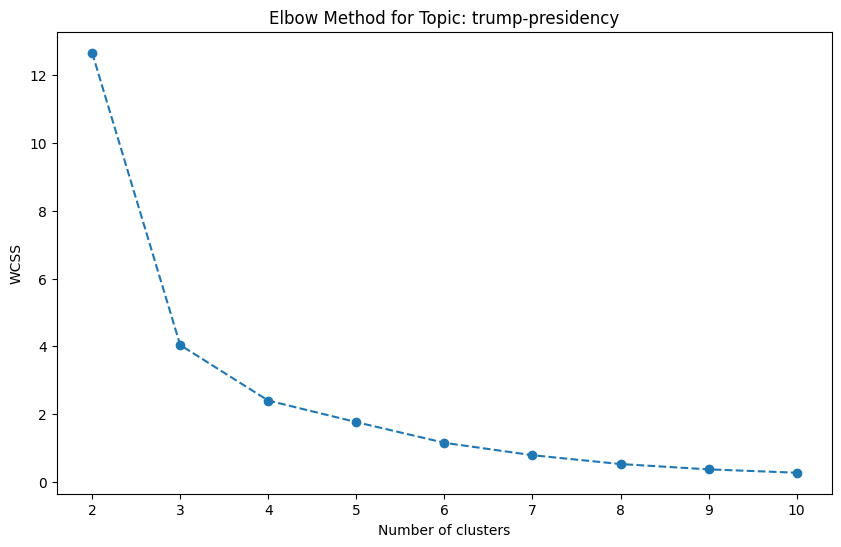

Topic: trump-presidency, Optimum Clusters: 10, Silhouette Score: 0.8366805684295118


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import ast

# Assuming 'df' is your DataFrame and 'Bert_embeddings' are in the correct format

# Placeholder for the optimum number of clusters and silhouette scores
dataset['Optimum_Clusters'] = None
dataset['Silhouette_Score'] = None

# Iterate over each topic
for topic in dataset['topic'].unique():
    # Extract Bert embeddings for the current topic
    topic_embeddings = dataset.loc[dataset['topic'] == topic, 'LDA_embeddings'].apply(ast.literal_eval).tolist()
    embeddings_array = np.array(topic_embeddings)

    # Variables to store the best scores and cluster numbers
    best_n_clusters = 0
    best_silhouette = -1

    # Elbow method: calculate WCSS for a range of cluster numbers
    wcss = []
    for n_clusters in range(2, 11):  # Example range from 2 to 10
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings_array)
        wcss.append(kmeans.inertia_)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(embeddings_array, kmeans.labels_)

        # Check if this is the best silhouette score so far
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_n_clusters = n_clusters

    # Plot WCSS for the current topic
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
    plt.title(f'Elbow Method for Topic: {topic}')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    # Perform clustering with the best number of clusters and update the DataFrame
    final_kmeans = KMeans(n_clusters=best_n_clusters, random_state=0).fit(embeddings_array)
    dataset.loc[dataset['topic'] == topic, 'Cluster'] = final_kmeans.labels_
    dataset.loc[dataset['topic'] == topic, 'Optimum_Clusters'] = best_n_clusters
    dataset.loc[dataset['topic'] == topic, 'Silhouette_Score'] = best_silhouette

    print(f"Topic: {topic}, Optimum Clusters: {best_n_clusters}, Silhouette Score: {best_silhouette}")


In [20]:
dataset.head(5)

,sentence,news_link,outlet,topic,type,group_id,num_sent,Label_bias,Label_opinion,article,...,LDA_embeddings,Optimum_Clusters_HC,Silhouette_Score_HC,Cluster_HC,Optimum_Clusters_EM,Silhouette_Score_EM,Cluster_EM,Optimum_Clusters,Silhouette_Score,Cluster
0,YouTube is making clear there will be no “birt...,https://eu.usatoday.com/story/tech/2020/02/03/...,usa-today,elections-2020,center,1,1,Biased,Somewhat factual but also opinionated,YouTube says no ‘deepfakes’ or ‘birther’ video...,...,"[0.5119968355612456, 0.3741073934069503, 0.113...",3,0.752599,0.0,2,0.608889,1.0,3,0.753211,2.0
1,The increasingly bitter dispute between Americ...,https://www.nbcnews.com/news/sports/women-s-te...,msnbc,sport,left,1,1,Non-biased,Entirely factual,"FRISCO, Texas — The increasingly bitter disput...",...,"[0.2623139567475268, 0.07613104104468951, 0.66...",3,0.72965,0.0,9,0.439802,1.0,3,0.727346,0.0
2,So while there may be a humanitarian crisis dr...,https://www.alternet.org/2019/01/here-are-5-of...,alternet,immigration,left,1,1,Biased,Expresses writer’s opinion,Speaking to the country for the first time fro...,...,"[0.10367035662751545, 0.8943813083897882, 0.00...",3,0.619915,2.0,6,0.551103,0.0,3,0.629818,0.0
3,A professor who teaches climate change classes...,https://www.breitbart.com/politics/2019/05/09/...,breitbart,environment,right,1,1,Non-biased,No agreement,A professor who teaches climate change classes...,...,"[0.4351612174486368, 0.17739632014235043, 0.38...",4,0.591638,2.0,4,0.492888,2.0,4,0.609073,3.0
4,"Looking around the United States, there is nev...",https://thefederalist.com/2020/03/11/woman-who...,federalist,abortion,right,1,1,Biased,Somewhat factual but also opinionated,The left has a thing for taking babies hostage...,...,"[0.0008456612534198671, 0.9983176539535233, 0....",8,0.698505,1.0,8,0.692397,3.0,10,0.710575,5.0


In [25]:
dataset.columns

Index(['sentence', 'news_link', 'outlet', 'topic', 'type', 'group_id',
       'num_sent', 'Label_bias', 'Label_opinion', 'article', 'biased_words4',
       'Text', 'LDA_embeddings', 'Optimum_Clusters_HC', 'Silhouette_Score_HC',
       'Cluster_HC', 'Optimum_Clusters_EM', 'Silhouette_Score_EM',
       'Cluster_EM', 'Optimum_Clusters', 'Silhouette_Score', 'Cluster'],
      dtype='object')

In [26]:
dataset.to_csv('/content/drive/My Drive/Colab Notebooks/DS Project/Dataset_with_LDA_embeddings_all_3_models.csv', index = False)

In [21]:
dataset[["outlet","topic","Cluster","Optimum_Clusters","Silhouette_Score"]]

,outlet,topic,Cluster,Optimum_Clusters,Silhouette_Score
0,usa-today,elections-2020,2.0,3,0.753211
1,msnbc,sport,0.0,3,0.727346
2,alternet,immigration,0.0,3,0.629818
3,breitbart,environment,3.0,4,0.609073
4,federalist,abortion,5.0,10,0.710575
...,...,...,...,...,...
1367,breitbart,coronavirus,0.0,3,0.768541
1368,alternet,gender,0.0,5,0.653826
1369,breitbart,gender,0.0,5,0.653826
1370,fox-news,middle-class,1.0,4,0.752283


In [30]:
dataset.columns

Index(['sentence', 'news_link', 'outlet', 'topic', 'type', 'group_id',
       'num_sent', 'Label_bias', 'Label_opinion', 'article', 'biased_words4',
       'Text', 'LDA_embeddings', 'Optimum_Clusters_HC', 'Silhouette_Score_HC',
       'Cluster_HC', 'Optimum_Clusters_EM', 'Silhouette_Score_EM',
       'Cluster_EM', 'Optimum_Clusters', 'Silhouette_Score', 'Cluster'],
      dtype='object')

In [31]:
unique_topics_dataset = dataset.drop_duplicates(subset=['topic', 'Optimum_Clusters'])

# Now group by 'Optimum_Clusters' to count unique topics in each cluster count
grouped_by_optimal_clusters = unique_topics_dataset.groupby('Optimum_Clusters')['topic'].nunique()

# Display the results
print("Unique topics per Optimum_Clusters:\n", grouped_by_optimal_clusters)

Unique topics per Optimum_Clusters:
 Optimum_Clusters
3     6
4     2
5     1
8     1
10    4
Name: topic, dtype: int64


In [22]:
dataset['Silhouette_Score'].unique(), dataset['Optimum_Clusters'].unique()

(array([0.7532108640762565, 0.7273461611486576, 0.6298184656527323,
        0.6090734529119278, 0.7105745064972406, 0.9359060707461753,
        0.8040994170602943, 0.7266152085205514, 0.7685410264714237,
        0.7522828303556716, 0.6538264059454107, 0.5511179430571145,
        0.6650363959101521, 0.8366805684295118], dtype=object),
 array([3, 4, 10, 8, 5], dtype=object))

In [29]:
topics = dataset['topic'].unique()
for topic in topics:
  print(dataset[dataset['topic'] == topic]['Cluster'].nunique())

3
3
3
4
10
3
10
8
3
4
5
3
10
10


In [27]:
# Group by 'type', 'topic', and 'Cluster_HC' for Hierarchical Clustering
hc_analysis = dataset.groupby(['type', 'topic', 'Cluster_HC']).size().reset_index(name='count_HC')

# Group by 'type', 'topic', and 'Cluster_EM' for EM Clustering
em_analysis = dataset.groupby(['type', 'topic', 'Cluster_EM']).size().reset_index(name='count_EM')

# Group by 'type', 'topic', and 'Cluster' for KMeans Clustering
kmeans_analysis = dataset.groupby(['type', 'topic', 'Cluster']).size().reset_index(name='count_KMeans')

# Now, you can access the analysis for each clustering algorithm
print("Analysis for Hierarchical Clustering:")
print(hc_analysis)
print("\nAnalysis for EM Clustering:")
print(em_analysis)
print("\nAnalysis for KMeans Clustering:")
print(kmeans_analysis)


Analysis for Hierarchical Clustering:
       type              topic  Cluster_HC  count_HC
0    center           abortion         0.0         2
1    center           abortion         2.0         2
2    center           abortion         4.0         2
3    center        coronavirus         0.0         1
4    center        coronavirus         2.0         4
..      ...                ...         ...       ...
168   right  white-nationalism         4.0         2
169   right  white-nationalism         5.0         1
170   right  white-nationalism         6.0         8
171   right  white-nationalism         8.0         2
172   right  white-nationalism         9.0        13

[173 rows x 4 columns]

Analysis for EM Clustering:
       type              topic  Cluster_EM  count_EM
0    center           abortion         1.0         1
1    center           abortion         2.0         2
2    center           abortion         6.0         3
3    center        coronavirus         1.0         4
4    cen

# Hierarchial Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import ast

# Placeholder for the optimum number of clusters and silhouette scores
dataset['Optimum_Clusters_HC'] = None
dataset['Silhouette_Score_HC'] = None

# Iterate over each topic
for topic in dataset['topic'].unique():
    # Extract Bert embeddings for the current topic
    topic_embeddings = dataset.loc[dataset['topic'] == topic, 'LDA_embeddings'].apply(ast.literal_eval).tolist()
    embeddings_array = np.array(topic_embeddings)

    # Variables to store the best scores and cluster numbers
    best_n_clusters = 0
    best_silhouette = -1

    # Calculate silhouette scores for a range of cluster numbers
    for n_clusters in range(2, 11):  # Example range from 2 to 10
        hc = AgglomerativeClustering(n_clusters=n_clusters)
        hc_labels = hc.fit_predict(embeddings_array)

        silhouette_avg = silhouette_score(embeddings_array, hc_labels)

        # Check if this is the best silhouette score so far
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_n_clusters = n_clusters

    # Perform clustering with the best number of clusters and update the DataFrame
    final_hc = AgglomerativeClustering(n_clusters=best_n_clusters)
    hc_labels_final = final_hc.fit_predict(embeddings_array)
    dataset.loc[dataset['topic'] == topic, 'Cluster_HC'] = hc_labels_final
    dataset.loc[dataset['topic'] == topic, 'Optimum_Clusters_HC'] = best_n_clusters
    dataset.loc[dataset['topic'] == topic, 'Silhouette_Score_HC'] = best_silhouette

    print(f"Hierarchical Clustering - Topic: {topic}, Optimum Clusters: {best_n_clusters}, Silhouette Score: {best_silhouette}")


Hierarchical Clustering - Topic: elections-2020, Optimum Clusters: 3, Silhouette Score: 0.7525993623986761
Hierarchical Clustering - Topic: sport, Optimum Clusters: 3, Silhouette Score: 0.7296501495272638
Hierarchical Clustering - Topic: immigration, Optimum Clusters: 3, Silhouette Score: 0.6199148789779988
Hierarchical Clustering - Topic: environment, Optimum Clusters: 4, Silhouette Score: 0.5916380042937756
Hierarchical Clustering - Topic: abortion, Optimum Clusters: 8, Silhouette Score: 0.6985052745270708
Hierarchical Clustering - Topic: student-debt, Optimum Clusters: 3, Silhouette Score: 0.9311480340806293
Hierarchical Clustering - Topic: vaccines, Optimum Clusters: 10, Silhouette Score: 0.8040588465634728
Hierarchical Clustering - Topic: white-nationalism, Optimum Clusters: 10, Silhouette Score: 0.7269061160406973
Hierarchical Clustering - Topic: coronavirus, Optimum Clusters: 3, Silhouette Score: 0.7675121730881396
Hierarchical Clustering - Topic: middle-class, Optimum Clusters:

In [13]:
dataset[["outlet","topic","Cluster_HC","Optimum_Clusters_HC","Silhouette_Score_HC"]]

,outlet,topic,Cluster_HC,Optimum_Clusters_HC,Silhouette_Score_HC
0,usa-today,elections-2020,0.0,3,0.752599
1,msnbc,sport,0.0,3,0.72965
2,alternet,immigration,2.0,3,0.619915
3,breitbart,environment,2.0,4,0.591638
4,federalist,abortion,1.0,8,0.698505
...,...,...,...,...,...
1367,breitbart,coronavirus,1.0,3,0.767512
1368,alternet,gender,5.0,10,0.643694
1369,breitbart,gender,5.0,10,0.643694
1370,fox-news,middle-class,0.0,4,0.75584


In [32]:
unique_topics_dataset = dataset.drop_duplicates(subset=['topic', 'Optimum_Clusters_HC'])

# Now group by 'Optimum_Clusters' to count unique topics in each cluster count
grouped_by_optimal_clusters = unique_topics_dataset.groupby('Optimum_Clusters_HC')['topic'].nunique()

# Display the results
print("Unique topics per Optimum_Clusters:\n", grouped_by_optimal_clusters)

Unique topics per Optimum_Clusters:
 Optimum_Clusters_HC
3     6
4     2
8     1
10    5
Name: topic, dtype: int64


In [15]:
dataset['Silhouette_Score_HC'].unique(), dataset['Optimum_Clusters_HC'].unique()

(array([0.7525993623986761, 0.7296501495272638, 0.6199148789779988,
        0.5916380042937756, 0.6985052745270708, 0.9311480340806293,
        0.8040588465634728, 0.7269061160406973, 0.7675121730881396,
        0.7558396624709875, 0.6436936893735853, 0.537674389191433,
        0.6385077751622062, 0.8366805684295118], dtype=object),
 array([3, 4, 8, 10], dtype=object))

#Expectation Maximization

In [16]:
from sklearn.mixture import GaussianMixture

# Placeholder for the optimum number of clusters and silhouette scores
dataset['Optimum_Clusters_EM'] = None
dataset['Silhouette_Score_EM'] = None

# Iterate over each topic
for topic in dataset['topic'].unique():
    # Extract Bert embeddings for the current topic
    topic_embeddings = dataset.loc[dataset['topic'] == topic, 'LDA_embeddings'].apply(ast.literal_eval).tolist()
    embeddings_array = np.array(topic_embeddings)

    # Variables to store the best scores and cluster numbers
    best_n_clusters = 0
    best_silhouette = -1

    # Calculate silhouette scores for a range of cluster numbers
    for n_clusters in range(2, 11):  # Example range from 2 to 10
        em = GaussianMixture(n_components=n_clusters, random_state=0)
        em.fit(embeddings_array)
        em_labels = em.predict(embeddings_array)

        silhouette_avg = silhouette_score(embeddings_array, em_labels)

        # Check if this is the best silhouette score so far
        if silhouette_avg > best_silhouette:
            best_silhouette = silhouette_avg
            best_n_clusters = n_clusters

    # Perform clustering with the best number of clusters and update the DataFrame
    final_em = GaussianMixture(n_components=best_n_clusters, random_state=0)
    em_labels_final = final_em.fit_predict(embeddings_array)
    dataset.loc[dataset['topic'] == topic, 'Cluster_EM'] = em_labels_final
    dataset.loc[dataset['topic'] == topic, 'Optimum_Clusters_EM'] = best_n_clusters
    dataset.loc[dataset['topic'] == topic, 'Silhouette_Score_EM'] = best_silhouette

    print(f"EM Clustering - Topic: {topic}, Optimum Clusters: {best_n_clusters}, Silhouette Score: {best_silhouette}")


EM Clustering - Topic: elections-2020, Optimum Clusters: 2, Silhouette Score: 0.6088889362864401
EM Clustering - Topic: sport, Optimum Clusters: 9, Silhouette Score: 0.4398021276809962
EM Clustering - Topic: immigration, Optimum Clusters: 6, Silhouette Score: 0.5511031552184567
EM Clustering - Topic: environment, Optimum Clusters: 4, Silhouette Score: 0.492887709541631
EM Clustering - Topic: abortion, Optimum Clusters: 8, Silhouette Score: 0.6923972117003213
EM Clustering - Topic: student-debt, Optimum Clusters: 3, Silhouette Score: 0.9359060707461753
EM Clustering - Topic: vaccines, Optimum Clusters: 2, Silhouette Score: 0.7283842469057399
EM Clustering - Topic: white-nationalism, Optimum Clusters: 10, Silhouette Score: 0.7360228615858666
EM Clustering - Topic: coronavirus, Optimum Clusters: 3, Silhouette Score: 0.7675121730881396
EM Clustering - Topic: middle-class, Optimum Clusters: 9, Silhouette Score: 0.7131731133537698
EM Clustering - Topic: gender, Optimum Clusters: 3, Silhouett

In [18]:
dataset['Silhouette_Score_EM'].unique(), dataset['Optimum_Clusters_EM'].unique()

(array([0.6088889362864401, 0.4398021276809962, 0.5511031552184567,
        0.492887709541631, 0.6923972117003213, 0.9359060707461753,
        0.7283842469057399, 0.7360228615858666, 0.7675121730881396,
        0.7131731133537698, 0.4897992450831282, 0.45543388143995833,
        0.606516621763383, 0.7323798211020501], dtype=object),
 array([2, 9, 6, 4, 8, 3, 10], dtype=object))